## Support Vector Machines

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as sop
from scipy.io import loadmat

from sklearn.svm import SVC

### Read Data

In [2]:
# Read data
data = loadmat('data/ex6data1.mat')
X = data['X']
y = data['y']
(m, n) = X.shape

### Plot Data

In [3]:
def plot_data(X, y, ax=None):
    if ax is None:
        plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], marker='+', label = 'Positive')
        plt.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], marker='o',  edgecolors='k', label = "Negative")
        plt.legend(loc=3)
    else:
        ax.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], marker='+', label = 'Positive')
        ax.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], marker='o',  edgecolors='k', label = "Negative")
        ax.legend(loc=3)

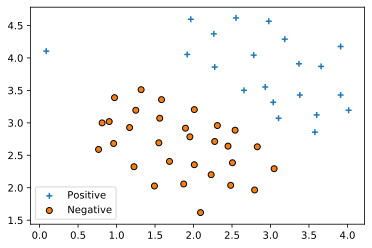

In [4]:
# Plot data
plot_data(X, y)

### Model ($C = 1$)

In [5]:
# Define support vector machine model with linear kernel and C = 1
svm_model = SVC(C=1.0, kernel='linear')

# Train model
svm_model.fit(X, y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Results

In [6]:
# Functions to plot decision boundary
def make_meshgrid(x, y, padding, h=.02):
    x_min, x_max = x.min() - padding, x.max() + padding
    y_min, y_max = y.min() - padding, y.max() + padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, ax):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=mpl.colors.ListedColormap(['r', 'c']), alpha=0.5)
    
def plot_decision_line(clf, ax, x_min, x_max):
    # See https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
    coef = clf.coef_[0]
    k = - coef[0] / coef[1]
    xx = np.linspace(x_min, x_max)
    yy = k * xx -(clf.intercept_[0]) / coef[1]
    
    ax.plot(xx, yy, 'k-')

def plot_svm_decision_linear(clf, X, y, padding=0.1):
    _, ax = plt.subplots()
    xx, yy = make_meshgrid(X[:,0], X[:,1], padding)
    plot_contours(clf, xx, yy, ax)
    plot_decision_line(clf, ax, xx.min(), xx.max())
    plot_data(X, y, ax)  
    plt.xlim(np.min(xx), np.max(xx))
    plt.ylim(np.min(yy), np.max(yy))
    plt.show()

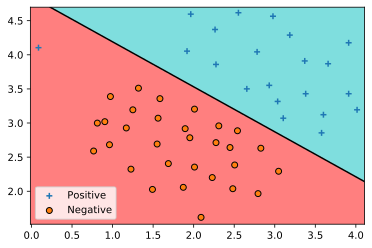

In [7]:
plot_svm_decision_linear(svm_model, X, y)

*Notice:* The decision boundary separates the data classes very well. The single mis-classified Positive sample does (correctly) not alter the decision line too much.

### Model ($C = 100$)

In [8]:
# Define support vector machine model with linear kernel and C = 100
svm_model2 = SVC(C=100, kernel='linear')

# Train model
svm_model2.fit(X, y.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

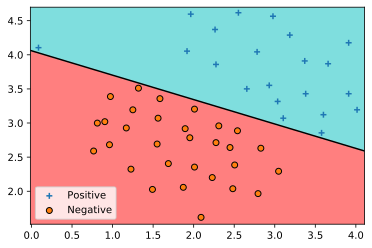

In [9]:
plot_svm_decision_linear(svm_model2, X, y)

*Note:* Now the outlier is captured correctly but the decision boundary does not seem
to be as natural a fit as in the model with $C = 1$.

## SVM with Gaussian Kernel

### Example 1

#### Read Data

In [10]:
# Read data
data2 = loadmat('data/ex6data2.mat')
X2 = data2['X']
y2 = data2['y']
(m2, n2) = X2.shape
print(X2.shape)

(863, 2)


#### Plot Data

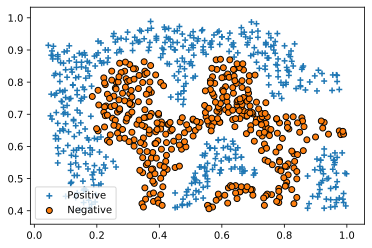

In [11]:
# Notice that this data is not linearly seperable
plot_data(X2, y2)

*Notice:* The data is not linearly separable.

#### Model

In [12]:
# Define gaussian kernel function:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-np.sum((x1 - x2) ** 2)/(2*(sigma ** 2)))

In [13]:
# Check gaussian kernel for two examples, value should be about 0.324652.
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [14]:
# Define support vector machine model with linear kernel and C = 1, gamma = 1/(2 * sigma^2) = 50 (for sigma = 0.1)
svm_model3 = SVC(C=1, kernel='rbf', gamma=50)

# Train model
svm_model3.fit(X2, y2.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Results

In [15]:
def plot_svm_decision_non_linear(clf, X, y, padding=0.1):
    _, ax = plt.subplots()
    xx, yy = make_meshgrid(X[:,0], X[:,1], padding)
    plot_contours(clf, xx, yy, ax)
    plot_data(X, y, ax)  
    plt.xlim(np.min(xx), np.max(xx))
    plt.ylim(np.min(yy), np.max(yy))
    plt.show()

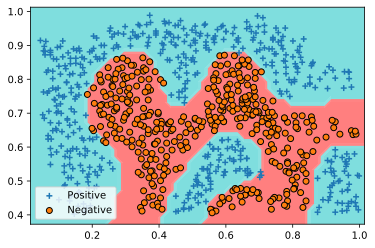

In [16]:
plot_svm_decision_non_linear(svm_model3, X2, y2, padding=0.03)

*Notice:* The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.

### Example 2

#### Read Data

In [17]:
data3 = loadmat('data/ex6data3.mat')
X3 = data3['X']
y3 = data3['y']
Xval3 = data3['Xval']
yval3 = data3['yval']
(m3, n3) = X3.shape
print(X3.shape)

(211, 2)


#### Plot Data

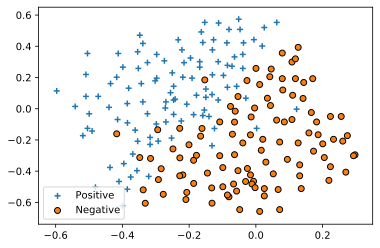

In [18]:
plot_data(X3, y3)

#### Model

In [19]:
# To use our own validation set for sklearn's grid search we have to merge training and validation sets and
# provide a test_fold vector (length = number of total samples), where test_fold[i] = 0 if sample i is part of 
# the validation set, and -1 otherwise.

from sklearn.model_selection import PredefinedSplit

X_tot = np.row_stack((X3, Xval3))
y_tot = np.row_stack((y3, yval3))

test_fold_tot = np.array([-1 if i < X3.shape[0] else 0 for i in range(X_tot.shape[0])])

# Define train/validation set split:
ps = PredefinedSplit(test_fold_tot)
print(ps.get_n_splits())

1


In [20]:
# We test several different combinations of C and gamma values using scikit-learn's GridSearchCV method
from sklearn.model_selection import GridSearchCV

# Define C and sigma test vectors:
Cvec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
sigmavec = Cvec
# sklearn expects gamma as parameter where gamma = 1/(2 * sigma^2)
gammavec = 1/(2 * (sigmavec ** 2))
print(Cvec)
print(gammavec)

#Define the parameter grid
param_grid = {'C': Cvec, 'gamma': gammavec}

# Define model
svm_model4 = SVC()

# Define grid search, using our predefined training/validation set split
grid_search = GridSearchCV(svm_model4, param_grid, cv=ps, iid=False)

# Train model 
grid_search.fit(X_tot, y_tot.ravel())

[1.e-02 3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01]
[5.00000000e+03 5.55555556e+02 5.00000000e+01 5.55555556e+00
 5.00000000e-01 5.55555556e-02 5.00000000e-03 5.55555556e-04]


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': array([1.e-02, 3.e-02, 1.e-01, 3.e-01, 1.e+00, 3.e+00, 1.e+01, 3.e+01]),
                         'gamma': array([5.00000000e+03, 5.55555556e+02, 5.00000000e+01, 5.55555556e+00,
       5.00000000e-01, 5.55555556e-02, 5.00000000e-03, 5.55555556e-04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Results

In [21]:
# Show best parameters found:
grid_search.best_params_

{'C': 1.0, 'gamma': 49.99999999999999}

In [22]:
# Show evaluation scores for all combinations, notice the best combination (C= 1, gamma ~ 50 (equ: sigma = 0.1)) 
# achieves the score 0.9823 (these are the same optimal parameters as found in matlab)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.6595452979136459 {'C': 0.01, 'gamma': 5000.0}
0.6595452979136459 {'C': 0.01, 'gamma': 555.5555555555555}
0.6595452979136459 {'C': 0.01, 'gamma': 49.99999999999999}
0.6595452979136459 {'C': 0.01, 'gamma': 5.555555555555555}
0.6595452979136459 {'C': 0.01, 'gamma': 0.5}
0.6595452979136459 {'C': 0.01, 'gamma': 0.05555555555555555}
0.6595452979136459 {'C': 0.01, 'gamma': 0.005}
0.6595452979136459 {'C': 0.01, 'gamma': 0.0005555555555555556}
0.6595452979136459 {'C': 0.03, 'gamma': 5000.0}
0.6595452979136459 {'C': 0.03, 'gamma': 555.5555555555555}
0.6708203932499369 {'C': 0.03, 'gamma': 49.99999999999999}
0.9273618495495703 {'C': 0.03, 'gamma': 5.555555555555555}
0.7874007874011811 {'C': 0.03, 'gamma': 0.5}
0.6595452979136459 {'C': 0.03, 'gamma': 0.05555555555555555}
0.6595452979136459 {'C': 0.03, 'gamma': 0.005}
0.6595452979136459 {'C': 0.03, 'gamma': 0.0005555555555555556}
0.6595452979136459 {'C': 0.1, 'gamma': 5000.0}
0.6595452979136459 {'C': 0.1, 'gamma': 555.5555555555555}
0.97211110476

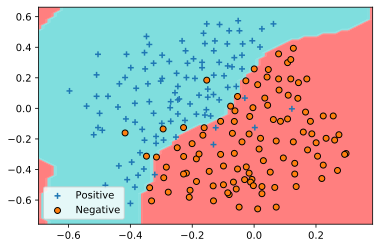

In [23]:
plot_svm_decision_non_linear(grid_search.best_estimator_, X3, y3)

*Notice:* The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.

## Spam classification

In [24]:
# TBD